In [3]:
pth = r'/home/zzj/projects/STAND/model_saving/STAND_win32_dm256_nl1_bi1_c50.pt'
proj_pth  = '/home/zzj/projects/STAND/'
import sys
sys.path.append(proj_pth)

import torch
model = torch.load(pth, weights_only=False)
print(model)

from utils import get_parse_args
config = get_parse_args()
config.win_size = 32
config.step_size = 10
config.dataset_name = 'SWAT'

from src.data_utils.SimAD_data_loader2 import get_loader_segment, SupervisedDataset

dataset_ = get_loader_segment(config.index, config.dataset_path+'/'+config.dataset_name, config.batch_size, 
                             config.win_size, config.step_size, 'train', config.dataset_name, 0, True)

train_dataset = SupervisedDataset(dataset_.test, dataset_.test_labels, config.win_size, config.step_size, 'train', config.train_test_split)

train_y = train_dataset.train
train_labels = train_dataset.train_labels
test_y = train_dataset.test
test_labels = train_dataset.test_labels
all_test_y = train_dataset.all_test_y
all_test_labels = train_dataset.all_test_labels

STAND(batch_size=128, bidirectional=1, contamination=0.1, d_model=256,
   debug=0, device='cuda', epochs=10, lr=0.001, normalize=False,
   num_layers=1, optimizer=None, win_size=32)
test: (449919, 50)
train: (495000, 50)


In [4]:
scores = model.decision_function(test_y)
print(scores)

[7.7137479e-09 5.6172955e-09 2.9461769e-09 ... 1.4144703e-07 6.8987802e-08
 7.1963591e-08]


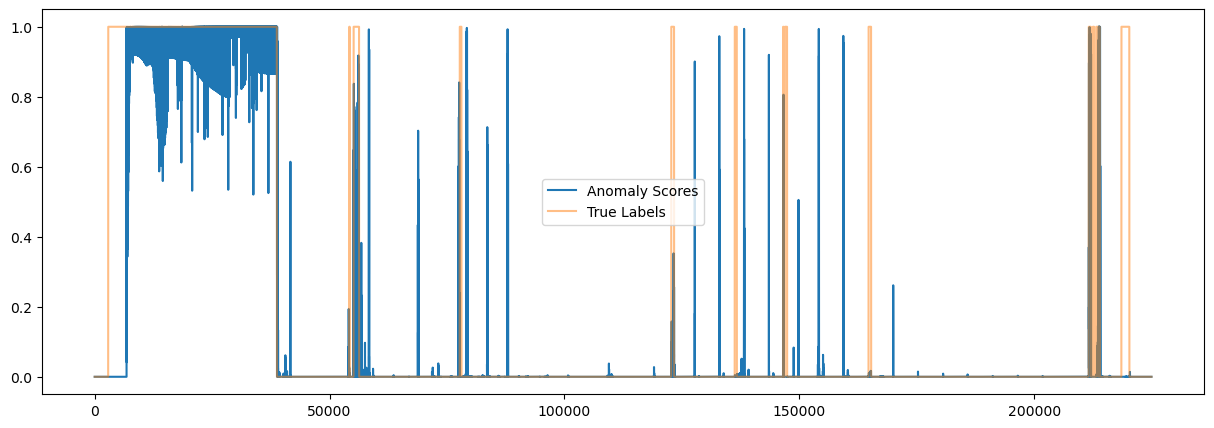

In [5]:
def plot_scores_vs_labels(scores, labels):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,5))
    plt.plot(scores, label='Anomaly Scores')
    plt.plot(labels * max(scores), label='True Labels', alpha=0.5)
    plt.legend()
    plt.show()

plot_scores_vs_labels(scores, test_labels)